In [1]:
import h5py
import numpy as np
import scipy
import itertools
from scipy.io import loadmat
import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import confusion_matrix

import pandas as pd
import tensorflow as tf
print(tf.__version__)

from keras.models import Sequential, load_model
from tensorflow.keras.layers import Reshape, Flatten, Dense, Conv1D ,Conv2D, MaxPooling2D, MaxPooling1D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2022-03-21 17:49:52.794498: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user12/Radio/lib/:
2022-03-21 17:49:52.794531: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.7.0


In [2]:
def evaluation_tf(report, y_test, y_pred, classes):
    plt.plot(report.history['loss'], label = 'training_loss')
    plt.plot(report.history['val_loss'], label = 'validation_loss')
    plt.legend()
    plt.show()
    plt.plot(report.history['accuracy'], label = 'training_accuracy')
    plt.plot(report.history['val_accuracy'], label = 'validation_accuracy')
    plt.legend()
    plt.show()
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    plt.imshow(cm, cmap=plt.cm.Blues)
    print(cm.shape[0],cm.shape[1])
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], 'd'),
                 horizontalalignment = 'center',
                 color='black')

    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.show()

In [3]:
model = load_model("/home/user12/Documents/MODCOD_Dir/Mod_3L_4D_NLnL_tan_16S16.h5")

2022-03-21 17:49:54.595436: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user12/Radio/lib/:
2022-03-21 17:49:54.595482: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-21 17:49:54.595515: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ipt-Precision-7920-Tower): /proc/driver/nvidia/version does not exist
2022-03-21 17:49:54.595860: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
filename = "/home/user12/Saad_External/MODCOD_DataSet/MOD_DATASET/MOD_Rayleighfadded_16Samp_N_NN1.h5"
f = h5py.File(filename, 'r')
a_group_key = list(f.keys())
print (a_group_key)


['DATA', 'DATATYPE', 'SNR']


In [5]:
data = np.array(f[a_group_key[0]])            #(600000, 256, 4)
datatype = np.array(f[a_group_key[1]])         #(600000, 1)
SNR = np.array(f[a_group_key[2]])               #(600000, 1)

print(data.shape)
print(datatype.shape)
print(SNR.shape)

(600000, 256, 4)
(600000, 1)
(600000, 1)


In [6]:
print(type(data)) 
print(type(datatype))
print(type(SNR))

print(data.shape)
print(datatype.shape)
print(SNR.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(600000, 256, 4)
(600000, 1)
(600000, 1)


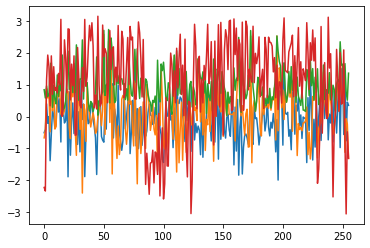

[-5.07822587e-01 -3.99931591e-01  3.97229555e-01 -2.14372294e-01
  1.16399837e-04 -1.38307941e+00 -5.40393231e-01  2.18821643e-01
  1.19601684e-02 -3.71034086e-01 -2.41858911e-01  9.61772196e-01
  1.39284402e-01  5.48898347e-01 -7.97349740e-01  1.92119857e+00
  2.09401541e-01 -2.02593359e-01 -1.27470523e-01  8.57568470e-01
 -1.88725294e+00  7.72774784e-01 -1.21124265e+00 -9.33360235e-02
  4.25782935e-01 -5.33927235e-01  6.27050986e-01  1.88460724e+00
 -8.73308193e-01  1.50447583e-01 -1.10675937e+00  1.12656151e+00
 -9.38746937e-02  3.87458189e-01 -1.88195313e+00 -5.56603957e-01
  3.39017372e-01 -2.23908263e-01 -1.64969040e-01  3.37368987e-01
  4.09432115e-01 -9.27649829e-02 -3.21154204e-01 -6.63394912e-01
 -1.81454670e+00 -4.31815502e-02  2.69969374e-01  5.11336844e-01
 -6.22977884e-01 -7.41967936e-01 -8.03240397e-01  3.45752350e-01
 -3.94016508e-01  9.55400043e-01  1.36133820e+00  3.83272193e-01
  2.40758759e-01  1.02958567e+00 -6.71020446e-01  2.38151104e-01
 -1.29199860e-02 -6.76895

In [7]:
point = 800
plt.plot(data[point,:,0])
plt.plot(data[point,:,1])
plt.plot(data[point,:,2])
plt.plot(data[point,:,3])

plt.show()

print(data[point,:,0])
print(datatype[point])
print(SNR[point])

# 0--BPSK , 1--QPSK , 2--PSK8 , 3--PSK16, 4--QAM16 , 5--QAM32
# [-4:2:14]

In [8]:
#data = f[a_group_key[0]]              #(600000, 256, 4)
#datatype = f[a_group_key[1]]          #(600000, 1)
#SNR = f[a_group_key[2]]               #(600000, 1)


#print(data.shape)
#print(datatype.shape)
#print(SNR.shape)

# Six different Modulation each with 100000 in length
# SNR... 10 bins for each modulation

# Result should be list of pair--- (16 symbols packet--- 256, Modulation Scheme (0...5))

# Write into pre-processed training data!

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, datatype, test_size = 0.2)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
                
                

(480000, 256, 4)
(120000, 256, 4)
(480000, 1)
(120000, 1)


In [11]:
report = model.fit(X_train, y_train, epochs = 20, validation_data=(X_test, y_test))

Epoch 1/20
15000/15000 [==============================] - 231s 15ms/step - loss: 0.7436 - accuracy: 0.7147 - val_loss: 0.6104 - val_accuracy: 0.7339
Epoch 2/20
15000/15000 [==============================] - 223s 15ms/step - loss: 0.6181 - accuracy: 0.7399 - val_loss: 0.5670 - val_accuracy: 0.7567
Epoch 3/20
15000/15000 [==============================] - 220s 15ms/step - loss: 0.5933 - accuracy: 0.7471 - val_loss: 0.5812 - val_accuracy: 0.7326
Epoch 4/20
15000/15000 [==============================] - 218s 15ms/step - loss: 0.5799 - accuracy: 0.7517 - val_loss: 0.5246 - val_accuracy: 0.7702
Epoch 5/20
15000/15000 [==============================] - 219s 15ms/step - loss: 0.5684 - accuracy: 0.7559 - val_loss: 0.5144 - val_accuracy: 0.7784
Epoch 6/20
15000/15000 [==============================] - 219s 15ms/step - loss: 0.5595 - accuracy: 0.7591 - val_loss: 0.5257 - val_accuracy: 0.7787
Epoch 7/20
15000/15000 [==============================] - 224s 15ms/step - loss: 0.5461 - accuracy: 0.7636

In [12]:
model.save('Mod_3L_4D_16S16_TF_NLnL_Rayleighfadded_N.h5')

In [13]:
y_pred = model.predict(X_test).argmax(axis = 1)

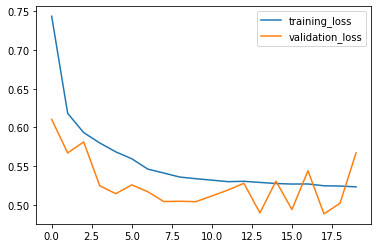

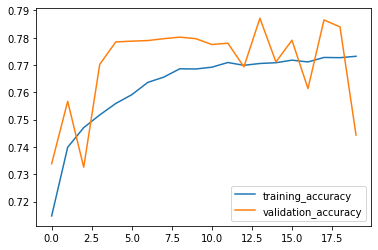

6 6


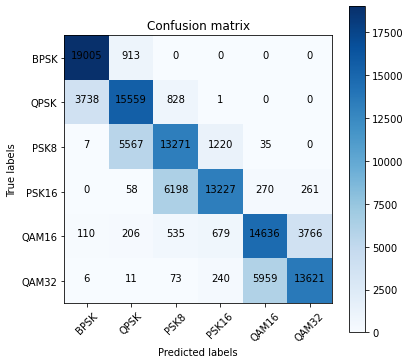

In [14]:
# 0--BPSK , 1--QPSK , 2--PSK8 , 3--PSK16, 4--QAM16 , 5--QAM32
Y = ['BPSK','QPSK','PSK8','PSK16','QAM16','QAM32']
evaluation_tf(report, y_test, y_pred, Y)